In [1]:
%%capture
%run final_chars_classification.ipynb



In [2]:
%run table_detector.ipynb

In [3]:
%run final_functions.ipynb

In [4]:
%run preprocessing.ipynb

In [5]:
%run get_rows_number.ipynb

In [6]:
# initialize_models()
load_models()

In [7]:
from tabular import tabular

In [8]:
def solve_expression(img, is_table = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    img = preprocessing(img, False)
    
    show_images([img])

    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img)
        cells, col_num, row_num = box_extraction(img, showTrace= False)#, table= True)

        letters = [classify(i, is_letter=True) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        # for l in letters:
        print(letters)
        # for l in numbers:
        print(numbers)
        #  # numbers.shape
         
        print(col_num)
        # print(numbers)
        solver = tabular.McCluskey()
        solver.solve(numbers,col_num)
        
        solver.logic()
        

    else: 

        expression_rows = get_rows_number(img)
        expressions = [classify(i, is_expression=True) for i in expression_rows ]
        # print(expression)
        return [get_table(expression) for expression in expressions]
        # return expression

    

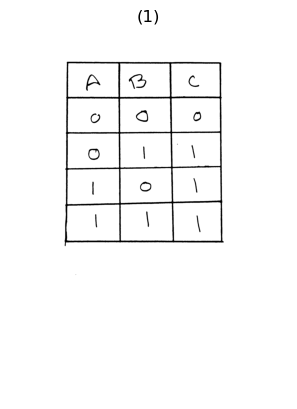

[array(['A'], dtype='<U1'), array(['B'], dtype='<U1'), array(['C'], dtype='<U1')]
[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]
3




Group No.	Minterms	Binary of Minterms
    1:
		    1                   01
		    2                   10
--------------------------------------------------
    2:
		    3                   11
--------------------------------------------------
Unmarked elements(Prime Implicants) of this table: None




Group No.	Minterms	Binary of Minterms
    0:
		1,3                     -1
		2,3                     1-
--------------------------------------------------
Unmarked elements(Prime Implicants) of this table: 1-, -1


All Prime Implicants:  1-, -1



Prime Implicants chart:

    Minterms    |1 2 3
2,3             |  X X
----------------------
1,3             |X   X
----------------------

Essential Prime Implicants: 1-, -1


Solution: F = A + B


In [12]:
image = cv2.imread("./test_images/table3.jpg")

solve_expression(image, is_table=True)




In [10]:
# show_images([table_tany(numbers)])